# Demo 6A
The purpose of this demonstration is to reiterate learning objects in lectures 6.1 through 6.3. After completing this demonstration, you should feel comfortable:
- loading and preparing textual data for analysis with regression-type supervised methods
- training a Lasso model and investigating significant parameters
- training a Support Vector Regression (SVR)
- training and fine-tuning the SVR model

### The Data
For this demonstration, we are going to use some data from Stocktwits, a popular Twitter-like platform used by investors to discuss stocks. The full universe of posts is massive--there are 10s of millions individual posts. To simplify, I've generated a random sample of 10,000 tweets from 2018 that we will analyze. Note that these tweets were originally collected via an API in a JSON format. I've provided them here in a dataframe.

We'll begin by loading the dataframe and inspecting.

In [ ]:
import pandas as pd, numpy as np
data_path = "/storage/ice-shared/mgt8833/classdata/stocktwits_sample.csv.gz"
df = pd.read_csv(data_path)
df

In [1]:
import pandas as pd, numpy as np

df = pd.read_csv('out.csv')
df

,twitID,author,author_followers,author_ideas,sentiment,text,tickers,timestamp,sentiment_score
0,145610683,shortvolume,564,55841,{'basic': 'Bearish'},$BCOR ranks 1675 by short volume at 72 pct The...,BCOR,2018-11-19 07:40:31,-0.9391
1,142498674,GoodNewsBull,2259,115484,{'basic': 'Bullish'},$NFLX Great Price action. Flush the weak on Op...,NFLX,2018-10-24 13:39:31,-0.2136
2,135730171,livetraderalerts,971,148564,NaN,$KS 2.5m ago: SEC Current event(s) report - Ot...,KS,2018-08-30 20:22:49,0.0000
3,125482718,WinAllDay,66,1044,{'basic': 'Bullish'},$ADA.X,ADA.X,2018-06-01 16:39:44,0.0000
4,143001861,MBoardman88,6,153,{'basic': 'Bullish'},@Dman20200 just making sureð. Really trying...,ATOS,2018-10-27 17:30:41,0.8465
...,...,...,...,...,...,...,...,...,...
9995,141224945,tygerview,3,36,{'basic': 'Bullish'},$CRMD we are almost at $3. So this leads me to...,CRMD,2018-10-12 21:41:38,0.0000
9996,122216361,Berserk74,37,4812,{'basic': 'Bullish'},$CHK chuckie sound like cookie. I like cookie....,CHK,2018-05-03 20:11:21,0.0000
9997,132457414,Nicknar1213,3,358,{'basic': 'Bullish'},$SESN MM's Breaking our Balls.... No worries e...,SESN,2018-08-02 19:25:09,0.8355
9998,137223056,JimInvestor,2588,24975,{'basic': 'Bearish'},Damaged ð«parabola Crumbling ð» $AMD L...,AMD,2018-09-13 19:16:23,-0.6667


In [6]:
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 741.7 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.5
    Uninstalling wcwidth-0.2.5:
      Successfully uninstalled wcwidth-0.2.5


Looks like there is some encoding issues... we could spin our wheels trying to figure out what the correct encoding is, but someone put together an incredibly useful package for NLP. It's conveniently called __[`ftfy`](https://pypi.org/project/ftfy/)__. 

In [9]:
import ftfy
df['text'] = df['text'].apply(lambda x: ftfy.ftfy(x))
df

,twitID,author,author_followers,author_ideas,sentiment,text,tickers,timestamp,sentiment_score
0,145610683,shortvolume,564,55841,{'basic': 'Bearish'},$BCOR ranks 1675 by short volume at 72 pct The...,BCOR,2018-11-19 07:40:31,-0.9391
1,142498674,GoodNewsBull,2259,115484,{'basic': 'Bullish'},$NFLX Great Price action. Flush the weak on Op...,NFLX,2018-10-24 13:39:31,-0.2136
2,135730171,livetraderalerts,971,148564,NaN,$KS 2.5m ago: SEC Current event(s) report - Ot...,KS,2018-08-30 20:22:49,0.0000
3,125482718,WinAllDay,66,1044,{'basic': 'Bullish'},$ADA.X,ADA.X,2018-06-01 16:39:44,0.0000
4,143001861,MBoardman88,6,153,{'basic': 'Bullish'},@Dman20200 just making sure👍. Really trying to...,ATOS,2018-10-27 17:30:41,0.8465
...,...,...,...,...,...,...,...,...,...
9995,141224945,tygerview,3,36,{'basic': 'Bullish'},$CRMD we are almost at $3. So this leads me to...,CRMD,2018-10-12 21:41:38,0.0000
9996,122216361,Berserk74,37,4812,{'basic': 'Bullish'},$CHK chuckie sound like cookie. I like cookie....,CHK,2018-05-03 20:11:21,0.0000
9997,132457414,Nicknar1213,3,358,{'basic': 'Bullish'},$SESN MM's Breaking our Balls.... No worries e...,SESN,2018-08-02 19:25:09,0.8355
9998,137223056,JimInvestor,2588,24975,{'basic': 'Bearish'},Damaged 🚫parabola Crumbling 🔻 $AMD Learn p...,AMD,2018-09-13 19:16:23,-0.6667


Emojis!

### Preprocessing the Data ###
We're going to go through much of the same process we've done before to create a document-term matrix that we can use in our supervised models. But, this data is a little different. Specifically, it's social media, so there are some extra considerations to consider with respect to tokenizing: 
- Hash-tags won't be parsed correctly with a standard, word boundary approach
- Single character tokens, which we usually drop, will include emojis
- Cash-tags also won't be handled correctly

We will use a custom tokenizer with sklearn's `CountVectorizer`. However, we're still going to start with a tokenizer designed for social media, `TweetTokenizer` from `nltk`. Let's look at an example:

In [12]:
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer

twtokenize = TweetTokenizer()

sample = "$AMZN sells everything 🙄....... but they make a lot of money! #gobig #primetime"
sample

'$AMZN sells everything 🙄....... but they make a lot of money! #gobig #primetime'

Compare the standard `word_tokenize` function to what we get from tweet tokenize:

In [15]:
word_tokenize(sample)

['$',
 'AMZN',
 'sells',
 'everything',
 '🙄',
 '.......',
 'but',
 'they',
 'make',
 'a',
 'lot',
 'of',
 'money',
 '!',
 '#',
 'gobig',
 '#',
 'primetime']

In [17]:
twtokenize.tokenize(sample)

['$',
 'AMZN',
 'sells',
 'everything',
 '🙄',
 '...',
 'but',
 'they',
 'make',
 'a',
 'lot',
 'of',
 'money',
 '!',
 '#gobig',
 '#primetime']

The main difference between the two is that the latter addresses hashtags. It also normalizes ellipses. 

So, let's start with this tokenizer and adjust from there. We will incorporate the following considerations:
1. Remove stop words
2. Normalize cash tags (we don't want certain firms driving our analysis)
3. Require tokens to be either a hashtag, an emoji, or a word (all alpha) of 3 or more characters

We have done (1) numerous times. For (2), we'll use a regex, and for (3) we'll use some if/else logic. Let's import some additional modules and start to set this up:

In [23]:
! pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 3.5 MB/s eta 0:00:0000:0100:01


In [25]:
import emoji, re
from nltk.corpus import stopwords

stops = stopwords.words('english')
cashtag_rx = re.compile(r'\$[a-z0-9.]+?\b',re.I) # can't have a leading \b because $ is not word character (could use \W* to lead).

Let's test our regular expression and look at how to use the emoji package:

In [28]:
print(re.search(cashtag_rx,'$CASHTAG'))
print(re.search(cashtag_rx,'NotAcashtag'))

<re.Match object; span=(0, 8), match='$CASHTAG'>
None


In [30]:
# Emoji function
print(emoji.is_emoji("hi"))
print(emoji.is_emoji("🐑"))

False
True


For the cash tags, we'll replace any cash tag with "cash_tag". We can use `re.sub` to accomplish this:

In [33]:
re.sub(cashtag_rx,'cash_tag',"I love $AMZN.")

'I love cash_tag.'

Now let's define a new function:

In [36]:
def myTweetTokenizer(tweet):
    tweet = re.sub(cashtag_rx,'cash_tag',tweet) # normalize cash tags
    toks = twtokenize.tokenize(tweet) # get list of tokens
    good_tokens = []
    for tok in toks:
        if emoji.is_emoji(tok):
            good_tokens.append(tok)
        elif tok=='cash_tag':
            good_tokens.append(tok)        
        elif len(tok)>=3 and tok.isalpha():
            good_tokens.append(tok.lower())    
        else:
            continue
    
    return good_tokens

# Test
print(sample)
myTweetTokenizer(sample)

$AMZN sells everything 🙄....... but they make a lot of money! #gobig #primetime


['cash_tag', 'sells', 'everything', '🙄', 'but', 'they', 'make', 'lot', 'money']

What's the issue here? We didn't retain hashtags!

How would you correct the function above? **PAUSE** for a minute or two and add some logic to retain hash tags.

In [38]:
#Your own work goes here:
def myTweetTokenizer(tweet):
    tweet = re.sub(cashtag_rx,'cash_tag',tweet) # normalize cash tags
    toks = twtokenize.tokenize(tweet) # get list of tokens
    good_tokens = []
    for tok in toks:
        if emoji.is_emoji(tok):
            good_tokens.append(tok)
        elif tok=='cash_tag':
            good_tokens.append(tok)        
        elif len(tok)>=3 and tok.isalpha():
            good_tokens.append(tok.lower())
        elif tok.startswith("#"):
            good_tokens.append(tok.lower())
        else:
            continue
    
    return good_tokens

# Test
print(sample)
myTweetTokenizer(sample)

$AMZN sells everything 🙄....... but they make a lot of money! #gobig #primetime


['cash_tag',
 'sells',
 'everything',
 '🙄',
 'but',
 'they',
 'make',
 'lot',
 'money',
 '#gobig',
 '#primetime']

Now let's "extract features" (or generate the document term matrix)

### Feature Extraction & Train/Test split
We're going to generate our DTM using TF-IDF weighted counts. We'll retain only the 1000 most common words, and then briefly inspect what those words are in each matrix. 

Since we've done this a few times now we'll go through this part relatively quickly. We're going to set these parameters:
- `lowercase`: Set to `False` (our tokenizer will handle this where it needs to)
- `tokenizer`: use `myTweetTokenizer`
- `ngram_range`: use `(1,2)` to allow for words and bigrams
- `max_features`: set to 2000
- `stop_words`: set equal to our stop word list, `stops`

In [42]:
df['text']

0       $BCOR ranks 1675 by short volume at 72 pct The...
1       $NFLX Great Price action. Flush the weak on Op...
2       $KS 2.5m ago: SEC Current event(s) report - Ot...
3                                                  $ADA.X
4       @Dman20200 just making sure👍. Really trying to...
                              ...                        
9995    $CRMD we are almost at $3. So this leads me to...
9996    $CHK chuckie sound like cookie. I like cookie....
9997    $SESN MM's Breaking our Balls.... No worries e...
9998    Damaged 🚫parabola  Crumbling 🔻  $AMD   Learn p...
9999    $TEUM mmmm!!! Smoked bear meat! Don't know if ...
Name: text, Length: 10000, dtype: object

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vec = CountVectorizer(lowercase = False, tokenizer = myTweetTokenizer, ngram_range = (1,2), max_features = 2000, stop_words = stops)
tfidf_vec = TfidfVectorizer(lowercase = False, tokenizer = myTweetTokenizer, ngram_range = (1,2), max_features = 2000, stop_words = stops)

dtm_c = count_vec.fit_transform(df['text'])
dtm_w = tfidf_vec.fit_transform(df['text'])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Now let's look at the top 10 words in each vectorizer:

In [48]:
vocab_c = np.asarray(count_vec.get_feature_names_out())
vocab_w = np.asarray(tfidf_vec.get_feature_names_out())

topn = 10
print(f"{topn} most common words based on word counts:\n")
words = vocab_c[np.asarray(dtm_c.todense()).sum(axis=0).argsort()[-topn:][::-1]]
print(", ".join(words))

print("\n")

print(f"{topn} most common words based on weighted counts:\n")
words = vocab_w[np.asarray(dtm_w.todense()).sum(axis=0).argsort()[-topn:][::-1]]
print(", ".join(words))


10 most common words based on word counts:

cash_tag, short, buy, shares, today, good, like, reporting, get, going


10 most common words based on weighted counts:

cash_tag, short, buy, today, going, good, like, shares, get, cash_tag cash_tag


It appears that the two methods produce similar features, as expected, with a few minor differences in ordering.

How many words appear in one vocabulary and not the other? **PAUSE** for a minute and see if I you can figure out how to answer that question?

In [51]:
# Your own work goes here:

The original data had a `sentiment score`, which is based on a proprietary NLP algorithm used by Stocktwits to understand the underlying sentiment of tweets. We're going to attempt to unpack this score with a Lasso Regression and SVR. Before doing so, though, we need to address the fact that these supervised models are prone to overfitting. We'll look at how to address the training procedure to address overfitting a little later, but let's start with a simple train/test split that will allow us to assess the model fit using a hold out sample. 

Scikit-learn offers a useful function called `train_test_split` for splitting the data (__[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__). The beauty of this function is that it will split multiple vectors/arrays, making sure everything stays aligned. In other words, suppose you have 3 datasets you want to use, and all three are "vertically aligned" (i.e., the rows line up). This function will split each of these 3 datasets, making sure the rows stay aligned across training and validation data. 

We'll use an 80/20 split for our data.

In [54]:
from sklearn.model_selection import train_test_split

c_train,c_test,w_train,w_test,y_train,y_test = train_test_split(dtm_c, dtm_w, df['sentiment_score'],train_size=0.80,random_state=123)

In [113]:
y_train

<8000x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 53334 stored elements in Compressed Sparse Row format>

### Training & Evaluating Supervised Model ###

#### Lasso
We'll start with the Lasso model, which introduces L1 regularization to OLS. We'll use `sklearn`'s __[implementation of Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)__, which is found in `linear_model`. We're going to focus on the weighted DTM, but you're welcome to use the simple word counts as well on your own. You should observe similar results.

##### Training the Lasso Model

Like most models, there are several key word arguments, or hyperparamters, that we can use to optimize the fit. The most important of these is `alpha`, which controls the magnitude of the penalty term. It defaults to 1.0, which is quite high with data on this scale. A value of 0 is equivalent to OLS.

Let's start by training a model with mostly default parameters. We will adjust 3:
- `alpha`: set to 0.1
- `selection`: random (this relates to how coefficients are updated during training; by default, the algorithm iteratively processes features sequentially)
- `random_state`: 123 (setting since we adjusted the value for `selection`)

We're also going to fit an OLS model to compare to.

In [59]:
from sklearn.linear_model import Lasso, LinearRegression as OLS

lasso = Lasso(alpha=0.1, selection="random", random_state=123)
ols = OLS()

In [61]:
lasso.fit(w_train,y_train)
ols.fit(w_train,y_train)

LinearRegression()

We've now trained both a Lasso model and OLS. How do we compare the results? There are many methods we could use. Let's focus on a few common ones:
- R<sup>2</sup>
- Mean-squared Error (MSE)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_train,ols.predict(w_train)))
print(mean_squared_error(y_train,ols.predict(w_train)))

0.6453974603662174
0.09347529725552453


In [66]:
print(r2_score(y_train,lasso.predict(w_train)))
print(mean_squared_error(y_train,lasso.predict(w_train)))

0.0
0.2636058313402424


Are you surprised? 

The Lasso model doesn't work well here, but it's important to note that in-sample, Lasso will *never* outperform OLS. OLS is the "best fit" (remember, "maximum likelihood"). The point of a Lasso model is to make a linear model more generalizable by identifying the most important features. Let's see how the models performed out of sample:

In [69]:
print(mean_squared_error(y_test,ols.predict(w_test)))
print(mean_squared_error(y_test,lasso.predict(w_test)))

0.17568904637802238
0.27192191268307897


The MSE remained roughly the same for Lasso (but this is overregularized, so it's not really informative), but you can see that OLS increased quite a bit. This suggests the OLS result might be overfitting the training data.

Next we'll try tuning our lasso model to optimize MSE, and we can then compare to OLS.

##### Tuning the Lasso model
To tune the model, we need to try many different values for `alpha`, the regularization parameter. Right now, the parameter is too large--all coefficients are being driven to 0. 

We could program a `for` loop that iterates over various values for `alpha`, but Scikit-learn offers a great means of tuning models, which I've mentioned before. For this exercise, we're going to use `GridSearchCV` (__[docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)__). This grid search procedure allows us to easily incorporate a number of features into our training. I've listed the key parameters that we haven't see yet, which we will use:
- `estimator`: the base model you are trying to train (e.g., a lasso model); this is positional and must come first
- `param_grid`: The dictionary of paramter combinations to try. The key(s) for this dictionary *must* correspond to key word arguments accepted by `estimator`; this is also positional and must come second
- `scoring`: How the model should be evaluated. You can define multiple metrics and then review the results, or you can define only one and the procedure can identify the optimum model. This is a complex parameter, allowing for built-in scores or custom metrics. For scikit-learn's built in metrics, see __[here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)__.
- `cv`: relates to cross-validation. We'll use 3 folds. 

We'll also use some parameters we've seen before for parallelization and setting a random state:

In [73]:
from sklearn.model_selection import GridSearchCV, KFold

alphas = [i/100000 for i in range(1,10001,2)]
params = {'alpha':alphas,'random_state':[123]}
len(alphas)

5000

Now we can set up the grid and fit. Note that I need to adjust another paramter, `refit` to be `False`. If not the method doesn't know how to go back and fit the best model (since we have multiple scoring parameters). This will take a few minutes, so go ahead and pause and come back once your grid has finished processing.

In [76]:
lasso = Lasso()

gs = GridSearchCV(lasso,params, scoring = ['neg_root_mean_squared_error','r2'],cv=3,n_jobs=-1,refit=False) # refit needs to be false since we have multiple metrics

# Now we fit the model using the same process as before:
gs.fit(w_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3199917956486047, tolerance: 0.14149314562621018
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21099703277019444, tolerance: 0.1399383912002633
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21713531563273136, tolerance: 0.14149314562621018
  model = cd_fast.sparse_enet_coordinate_descent(


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 3e-05, 5e-05, 7e-05, 9e-05, 0.00011,
                                   0.00013, 0.00015, 0.00017, 0.00019, 0.00021,
                                   0.00023, 0.00025, 0.00027, 0.00029, 0.00031,
                                   0.00033, 0.00035, 0.00037, 0.00039, 0.00041,
                                   0.00043, 0.00045, 0.00047, 0.00049, 0.00051,
                                   0.00053, 0.00055, 0.00057, 0.00059, ...],
                         'random_state': [123]},
             refit=False, scoring=['neg_root_mean_squared_error', 'r2'])

The search has finished. Note that this ran 15,000 different model fits (5000 unique values for `alpha`, three folds each time). 

Let's see how changing alpha impacted the two metrics we tracked. The results of the grid search are stored in an attribute called `cv_results_`, which is a dictionary. 

In [79]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_random_state', 'params', 'split0_test_neg_root_mean_squared_error', 'split1_test_neg_root_mean_squared_error', 'split2_test_neg_root_mean_squared_error', 'mean_test_neg_root_mean_squared_error', 'std_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

We're going to focus on the `mean_test_`... values, which provides the mean values from the "test" folds. As a reminder for how 3-fold cross validation works:
1. Run 1: Train on folds 1 & 2, test model on 3
2. Run 2: Train on folds 1 & 3, test model on 2
3. Run 3: Train on folds 2 & 3, test model on 1

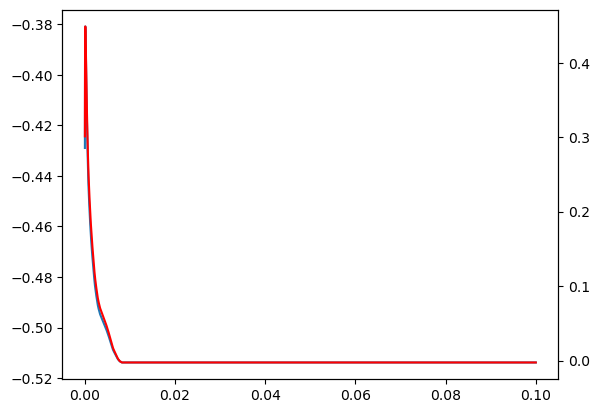

In [84]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax2 = ax.twinx()

ax.plot(gs.cv_results_['param_alpha'],gs.cv_results_['mean_test_neg_root_mean_squared_error'])
ax2.plot(gs.cv_results_['param_alpha'],gs.cv_results_['mean_test_r2'],color='red')

It looks like there is some interesting variation between 0.00 and 0.01, so let's zoom in on that part of the graph:

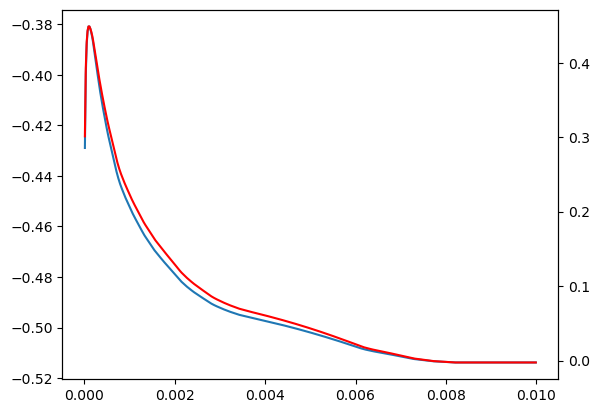

In [87]:
fig,ax = plt.subplots(1,1)
ax2 = ax.twinx()
ax.plot(gs.cv_results_['param_alpha'][:500],gs.cv_results_['mean_test_neg_root_mean_squared_error'][:500])
ax2.plot(gs.cv_results_['param_alpha'][:500],gs.cv_results_['mean_test_r2'][:500],color='red')

These two metrics are different versions of the same underlying metric. We can determine which value for alpha corresponds to the peak using `argmax`:

In [90]:
max_r2 = gs.cv_results_['mean_test_r2'].argmax()
print(f"The alpha that produces the maximum R2 (and minimum MSE) is {gs.cv_results_['param_alpha'][max_r2]}.")

The alpha that produces the maximum R2 (and minimum MSE) is 9e-05.


Let's now refit the best model and look at how it compares to OLS in explaining variation in the hold out sample:

In [93]:
lasso = Lasso(alpha=gs.cv_results_['param_alpha'][max_r2],
              random_state=123)
lasso.fit(w_train,y_train)

print(mean_squared_error(y_test,ols.predict(w_test)))
print(mean_squared_error(y_test,lasso.predict(w_test)))

0.17568904637802238
0.14560767782686532


This (slight) improvement came because even a little bit of regularization drove some irrelevant features to have 0 coefficients:

In [96]:
lasso.coef_

array([-0.        ,  0.03184005, -0.        , ...,  0.        ,
        0.        ,  0.        ])

Compare this to OLS:

In [99]:
ols.coef_

array([-0.00313655,  0.25895978, -0.41482633, ...,  0.0985648 ,
        0.1694942 ,  0.0513761 ])

In conclusion, Lasso did improve things for *out of sample* prediction. 

##### Before moving on...
How many coefficients (of the 2000) were set to 0 in the lasso model? Which 20 coefficients were most significant predictors of `sentiment_score`, and what words/bigrams correspond to those? **PAUSE** and work on the answer.

In [102]:
# Your own work goes here:

## Support Vector Regression
The second type of ML-based regression model we will examine is a Support Vector Regression. SVR differs from OLS or Lasso in that it tries to learn the hyperplane that best maps data. OLS and Lasso are both identifying the best *linear* fit, but SVR allows for nonlinearity through various "kernel functions". 

#### Training an SVR

We will use `sklearn`'s implementation of __[Support Vector Regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)__, found in `sklearn.svm` (svm = support vector machine):

In [105]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(w_train,y_train)

SVR()

In [107]:
print(mean_squared_error(y_train,svr.predict(w_train)))
print(mean_squared_error(y_train,lasso.predict(w_train)))
print(mean_squared_error(y_train,ols.predict(w_train)))

0.03503353890969141
0.11613768955063622
0.09347529725552453


The significant improvement is because we allowed nonlinearity. BUT... this is in-sample. What about out-of-sample? **PAUSE** and compute the out-of-sample MSE for each model.

In [110]:
# Your own work goes here:

We *definitely* need to account for overfitting when training SVR. We'll do so during model tuning, but given the significant number of parameters available for an SVR we'll use a randomized search this time.

#### Tuning the SVR
`SVR` has a number of different hyperparameters related to what kind of kernel function is used to introduce nonlinearity into the input data, as well as hyperparameters related to the training procedure. We'll tune with the following hyperparameters:
- `kernel`: The kernel function to use. We'll try `poly`,`rbf`, and `sigmoid`
- `degree`: Only applies to `poly` kernel function, but controls which degree polynomial to use. We'll try 2, 3, 4, 5.
- `gamma`: a "kernel coefficient". We'll try random values between 0.0005 and 0.10 (note that the default is 1/number of features, or 0.00067).
- `C`: the regularization parameter. We'll values between 0.1 and 1.25 (1 is the default)

As alluded to previously, we will use a randomized search here. Before we set up, though, let's consider `gamma`, where we want to try random numbers from some distribution. When we specify a parameter set for our grid/randomized search, we can use lists of options, as we have before, or we can actually use a "callable" that returns some value. We could define a custom function, or use a special random-number generator that follows the parameters we want. We'll do the latter.

If you review the documentation for __[`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)__, you'll see that the callable for generating random numbers must have an `rvs` method. The `scipy` stats distributions have this method, so we'll rely on those.

In [ ]:
from scipy.stats import uniform
uni = uniform(0.0005,0.10)

In [ ]:
# Using RVS:
uni.rvs()

Now that we have this uniform distribution set up, let's set up our full paramter grid:

In [ ]:
gamma_dist = uniform(0.0005,0.10)
C_dist = uniform(0.1,1.25)

params = {'kernel':['poly','rbf','sigmoid'],
          'degree':[2,3,4,5],
          'gamma': gamma_dist,
          'C': C_dist}

And we can set up our randomized search with 3-fold cross-validation. We'll use MSE (`neg_root_mean_squared_error`) as our evaluation metric. We'll then fit the model as we did with the grid search earlier.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svr = SVR()
rus = RandomizedSearchCV(svr,
                         params,
                         n_iter = 25,
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1,
                         cv = 3,
                         random_state = 123)

rus.fit(w_train,y_train)

Let's first see how the best fit model did on the training data. Since the model refit (we only had one metric), we can use `rus` like we would any other model:

In [ ]:
print(mean_squared_error(y_train,rus.predict(w_train)))
print(mean_squared_error(y_train,lasso.predict(w_train)))
print(mean_squared_error(y_train,ols.predict(w_train)))

Why is this no longer overfitted? Because we used cross-validation!

How did this perform on the hold out sample?

In [ ]:
print(mean_squared_error(y_test,rus.predict(w_test)))
print(mean_squared_error(y_test,lasso.predict(w_test)))
print(mean_squared_error(y_test,ols.predict(w_test)))

It appears that the lasso model still did the best, but both outperformed OLS. 

Finally, we can look at what the best parameter set was:

In [ ]:
rus.best_params_

What about most influential features?

We can't really assess directly like we can with a true linear regression (e.g., Lasso, OLS). With SVR and other nonlinear methods, feature importance is often observation specific. There are methods available for assessing feature importance, such as shapley values and permutation importance, but we won't cover those in here.